<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

# Filtering labels

Here we treat the labels extracted from `models_phenom` such as to have smoother ones. For instance, we will define a minimum segment length.

In [1]:
#|output: asis
#| echo: false
show_doc(label_filter)

---

### label_filter

>      label_filter (label, window_size=5, min_seg=3)

In [2]:
#|output: asis
#| echo: false
show_doc(majority_filter)

---

### majority_filter

>      majority_filter (seq, width)

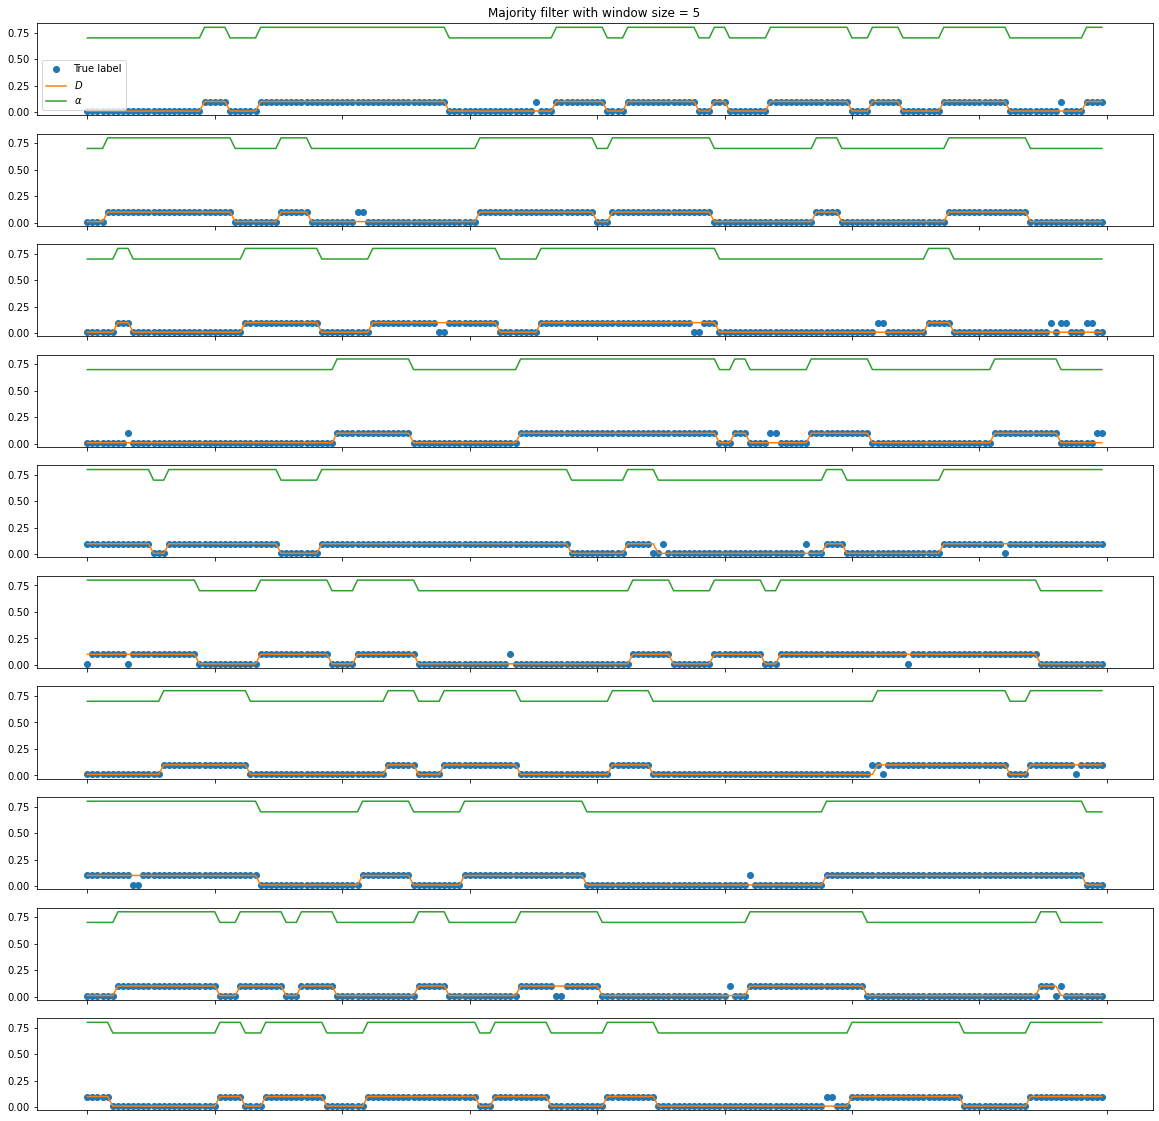

In [ ]:
fig, axs = plt.subplots(10, 1, figsize = (20, 20))
window_size = 5

for ax in axs:    
    traj, labs = models_phenom()._multiple_state_traj(alphas = [0.7, 0.8], Ds = [0.01, 0.1])
    filtered_d = label_filter(labs[:,1])
    filtered_a = label_filter(labs[:,0])
    
    ax.plot(labs[:, 1], 'o', label = 'True label')
    ax.plot(filtered_d, label = r'$D$')
    ax.plot(filtered_a, label = r'$\alpha$')
    
axs[0].set_title(f'Majority filter with window size = {window_size}')
axs[0].legend()
plt.setp(axs, xticklabels = []);

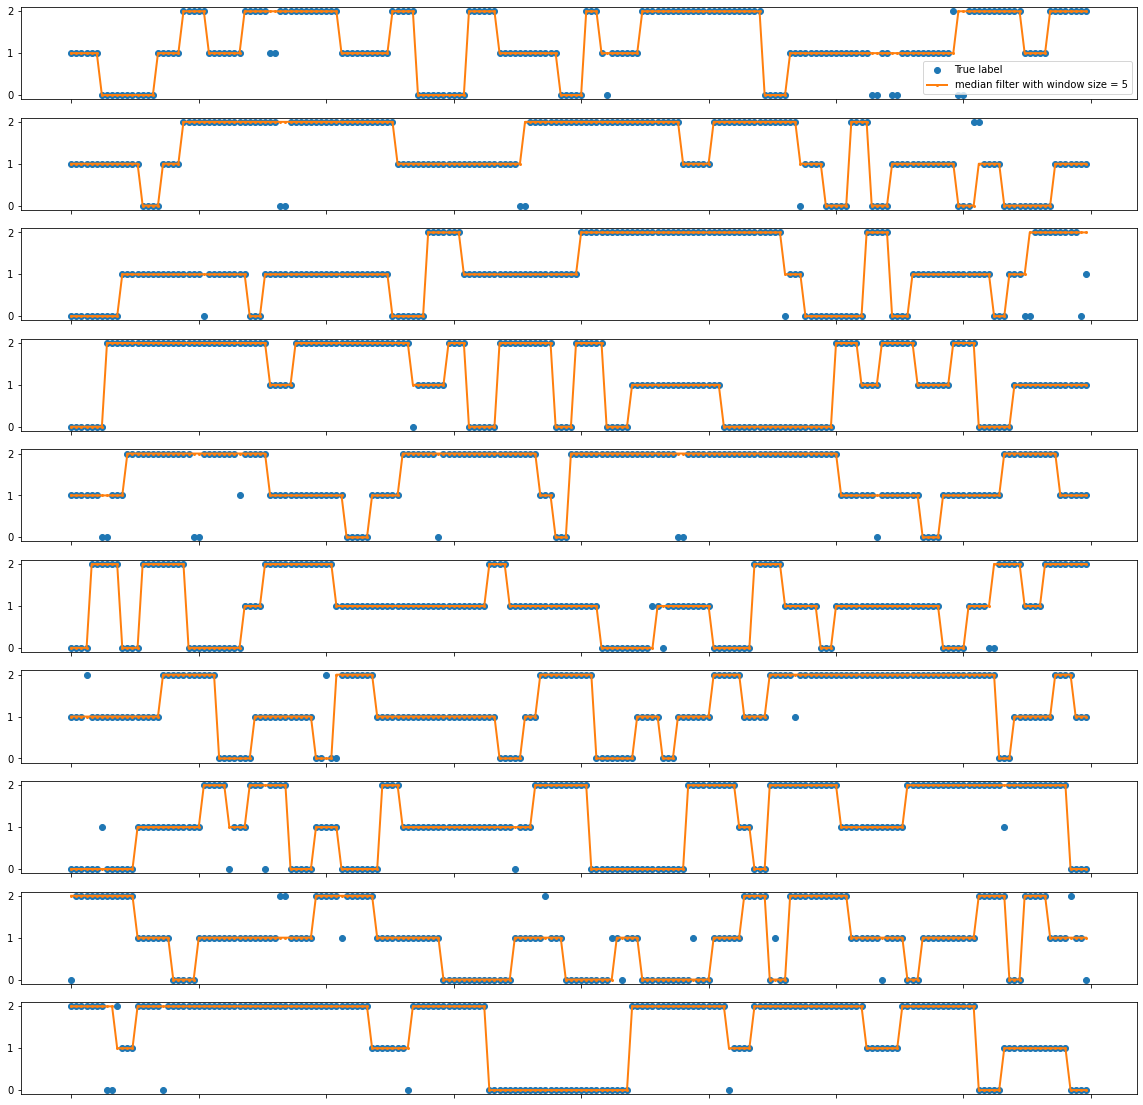

In [ ]:
fig, axs = plt.subplots(10, 1, figsize = (20, 20))
filt_size = 5

M = [[0.8, 0.1, 0.1],[0.05, 0.9, 0.05], [0.05, 0.05, 0.9]]
alphas = [0.7, 1, 1.2]
Ds = [0, 1, 2]

for ax in axs:    
    traj, labs = models_phenom._multiple_state_traj(alphas = alphas, Ds = Ds, M = M)
    filtered = label_filter(labs[:,1], window_size=filt_size)
    
    ax.plot(labs[:, 1], 'o', label = 'True label')
    ax.plot(filtered, 'o-', ms = 2, label = f'median filter with window size = {filt_size}', lw = 2)
axs[0].legend()
plt.setp(axs, xticklabels = []);

## Calculating new transition rates after filtering

In [ ]:
T = 1000
traj, labs = models_phenom().multi_state(N = 500, alphas = [0.7, 1], Ds = [0, 1], T = T)

NameError: name 'label' is not defined

In [ ]:
res_t = np.array([])
res_ft = np.array([])
for label in tqdm(labs.transpose(1,0,2)[:,:,0]):
    
    # raw labels
    CP = np.argwhere(label[1:] != label[:-1]).flatten()
    if CP[-1] != 199: CP = np.append(CP, T-1)
    CP = np.append(0, CP)

    res_t = np.append(res_t, CP[1:] - CP[:-1])
    
    
    # filtered labels
    filt = label_filter(label)
    
    CP_f = np.argwhere(filt[1:] != filt[:-1]).flatten()
    if CP_f[-1] != 199: CP_f = np.append(CP_f, T-1)
    CP_f = np.append(0, CP_f)

    res_ft = np.append(res_ft, CP_f[1:] - CP_f[:-1])

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
print(f' True transition rate: {1/np.mean(res_t)}\n',
      f'Filtered transition rate: {1/np.mean(res_ft)}\n',
      f'True rate x 2/3: {1/np.mean(res_t)*(2/3)}')

 True transition rate: 0.10091711711711712
 Filtered transition rate: 0.06881721721721722
 True rate x 2/3: 0.06727807807807808


In [ ]:
1/0.10091711711711712

9.909121748290453

In [ ]:
1/0.06881721721721722

14.5312472726638

## From step-wise labels to list of properties

In [3]:
#|output: asis
#| echo: false
show_doc(stepwise_to_list)

---

### stepwise_to_list

>      stepwise_to_list (labels)

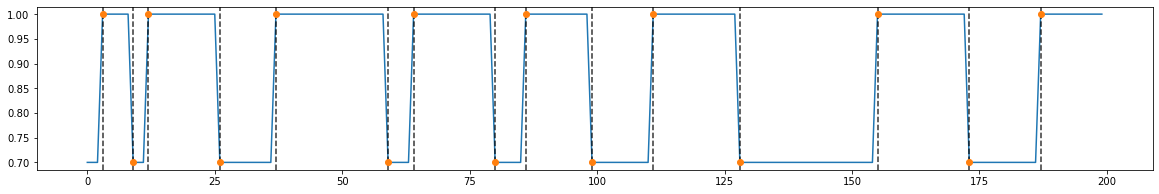

In [ ]:
traj, labs = models_phenom._multiple_state_traj(alphas = [0.7, 1], Ds = [0, 1])

filt_alpha = label_filter(labs[:,0])
filt_D = label_filter(labs[:,1])

CP, Ds, alphas = stepwise_to_list(np.vstack((filt_alpha, filt_D)).transpose())

fig, ax = plt.subplots(figsize = (20, 3))
ax.plot(filt_alpha, zorder = -1)
for idx, cp in enumerate(CP): 
    ax.axvline(cp, c = 'k', ls = '--', alpha = 0.8, zorder = -1)
    plt.scatter(cp, alphas[idx+1], c = 'C1', zorder = 2)

# Continuous labels to list of features

The labels in the challenge will be the list of $n$ changepoints as well as the $n+1$ diffusion properties ($D$ and $\alpha$) for each segment. This function transforms the stepwise labels into three lists: CPs, $\alpha$s and $D$s.

### `continuous_label_to_list`

In [4]:
#|output: asis
#| echo: false
show_doc(continuous_label_to_list)

---

### continuous_label_to_list

>      continuous_label_to_list (labs)

Given an array of T x 2 labels containing the anomalous exponent and diffusion 
coefficient at each timestep, returns 3 arrays, each containing the changepoints, 
exponents and coefficient, respectively. 
If labs is size T x 3, then we consider that diffusive states are given and also
return those.

Text(0, 0.5, '$\\alpha$')

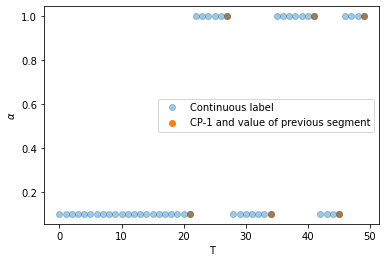

In [ ]:
T = 50
trajs, labels = models_phenom().multi_state(N = 1, T = T)

CP, alphas, Ds, _ = continuous_label_to_list(labels[:,-1,:])
plt.plot(labels[:, -1, 1], 'o', alpha = 0.4, label = 'Continuous label')
plt.scatter(CP-1, Ds, c = 'C1', label = 'CP-1 and value of previous segment')
plt.legend(); plt.xlabel('T'); plt.ylabel(r'$\alpha$')

# List of features to continuous labels
This function does the opposite from the previous. From a list of properties as the one used in ANDI 2022, creates continuous labels

In [5]:
#|output: asis
#| echo: false
show_doc(list_to_continuous)

---

### list_to_continuous

>      list_to_continuous (CP, label)

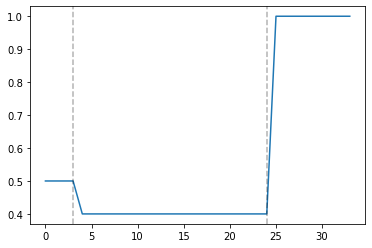

In [ ]:
CP = [3,24,34]
label = [0.5, 0.4, 1]
cont = list_to_continuous(CP, label)
plt.plot(cont)
[plt.axvline(c, c = 'k', ls = '--', alpha = 0.3) for c in CP[:-1]];

# Storing data in DataFrame

### `data_to_df`

In [6]:
#|output: asis
#| echo: false
show_doc(data_to_df)

---

### data_to_df

>      data_to_df (trajs, labels, label_values, diff_states, min_length=10,
>                  fov_origin=[0, 0], fov_length=100, cutoff_length=10)

Inputs:
:trajs (dimension: T x N x2):
:labels (dimension: T x N x 2):
:label_values (array) (size: # of states): values of any property for every existing state.
:diff_states (array) (size: # of states): labels correspoding to each state as defined in the
ANDI 2022 state labels: 0: immobile; 1: confined; 2: free diffusion; 3: directed.

Outputs:
:df_in (dataframe): dataframe with trajectories
:df_out (datafram): datafram with label and information

In [ ]:
#trajs, labels = models_phenom().multi_state(T = 200, N = 10, alphas=[0.5, 1], Ds = [1,1], L = 100)
trajs, labels = models_phenom().single_state(T = 200, N = 10)


trajs = trajs.transpose((1, 0, 2)).copy()
labels = labels.transpose(1, 0, 2)

In [ ]:
df_in, df_out = data_to_df(trajs, labels, label_values=[0.5, 1], diff_states=[3, 2])

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
df_out

,traj_idx,Ds,alphas,states,changepoints
0,0,[1.0],[1.0],[2.0],[12]
1,1,[1.0],[1.0],[2.0],[29]
2,2,[1.0],[1.0],[2.0],[37]
3,3,[1.0],[1.0],[2.0],[16]
4,4,[1.0],[1.0],[2.0],[33]
5,5,[1.0],[1.0],[2.0],[92]
6,6,[1.0],[1.0],[2.0],[79]
7,7,[1.0],[1.0],[2.0],[15]
8,8,[1.0],[1.0],[2.0],[37]


# Transform dataframe to array with padding

In [7]:
#|output: asis
#| echo: false
show_doc(df_to_array)

---

### df_to_array

>      df_to_array (df, pad=-1)

Transform a dataframe as the ones given in the ANDI challenge 2 (i.e. 4 columns:
traj_idx, frame, x, y) into a numpy array. To deal with irregular temporal supports,
we pad the array whenever the trajectory is not present.
The output array has the typical shape of ANDI datasets: TxNx2

# `get_VIP`

In [8]:
#|output: asis
#| echo: false
show_doc(get_VIP)

---

### get_VIP

>      get_VIP (array_trajs, num_vip=5, min_distance=2, pad=-1)

Given an array of trajectories, finds the particles that have exists at frame 0
(i.e. that their first value is different from pad). Then, iterates over this 
particles to find num_vip that are at distance > than min_distance in the first
frame.

# Challenge 2022 metrics

## Changepoint pairing
We use an assignment algorithm to pair predicted and groundtruth changepoints. From there, we will calculate the various metrics of the challenge.

#### `changepoint_assignment`

In [9]:
#|output: asis
#| echo: false
show_doc(changepoint_assignment)

---

### changepoint_assignment

>      changepoint_assignment (GT, preds)

Given a list of groundtruth and predicted changepoints, solves the assignment problem via
the Munkres algorithm (aka Hungarian algorithm) and returns two arrays containing the index of the
paired groundtruth and predicted changepoints, respectively.

In [ ]:
ngts = 10; npreds = 6; T = 100
GT = np.sort(np.random.choice(np.arange(1,T), ngts, replace = False))
preds = np.sort(np.random.choice(np.arange(1,T)*0.5, npreds, replace = False))
assig = changepoint_assignment(GT, preds)[0]

In [ ]:
GT[assig[0]]

array([ 7, 13, 24, 30, 48, 55])

In [ ]:
preds[assig[1]]

array([ 2.5,  5. ,  8. , 11.5, 30. , 34.5])

In [ ]:
changepoint_assignment(GT, preds)[0]

(array([4, 5, 6, 7, 8, 9], dtype=int64),
 array([5, 0, 1, 2, 4, 3], dtype=int64))

#### `changepoint_alpha_beta`

In [10]:
#|output: asis
#| echo: false
show_doc(changepoint_alpha_beta)

---

### changepoint_alpha_beta

>      changepoint_alpha_beta (GT, preds, treshold=10)

Calculate the alpha and beta measure of paired changepoints.
Inspired from Supplemantary Note 3 in https://www.nature.com/articles/nmeth.2808

<matplotlib.legend.Legend>

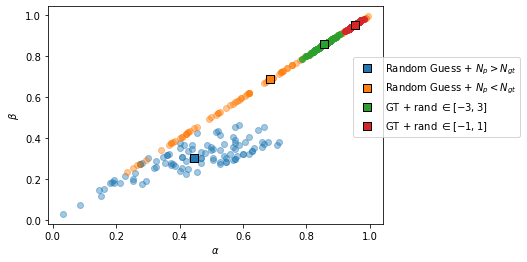

In [ ]:
labels = [r'Random Guess + $N_p>N_{gt}$',
          r'Random Guess + $N_p<N_{gt}$',
          r'GT + rand $\in [-3, 3]$',
          r'GT + rand $\in [-1, 1]$']

fig, ax = plt.subplots()
alpha = 0.2

T = 200; ngts = 15; 

for case, (label, color) in enumerate(zip(labels, ['C0', 'C1', 'C2', 'C3'])):

    alphas, betas = [], []
    for _ in range(100):
        
        GT = np.sort(np.random.choice(np.arange(1,T), ngts, replace = False))
        if case == 0:
            npreds = np.random.randint(low = ngts, high = ngts*2)
            preds = np.sort(np.random.choice(np.arange(1,T), npreds, replace = False)) 
        elif case == 1:
            npreds = np.random.randint(low = 1, high = ngts)
            preds = np.sort(np.random.choice(np.arange(1,T), npreds, replace = False))     
        elif case == 2:
            preds = GT + np.random.randint(-3, 3, ngts)
        elif case == 3:
            preds = GT + np.random.randint(-1, 1, ngts)
            
        alpha, beta = changepoint_alpha_beta(GT, preds)
        
        alphas.append(alpha)
        betas.append(beta)
     

    
    ax.scatter(alphas, betas, c = color, alpha = alpha)
    ax.scatter(np.mean(alphas), np.mean(betas), c = color, label = label, s = 50, marker = 's', edgecolors = 'k')
plt.setp(ax, xlabel = r'$\alpha$', ylabel = r'$\beta$')
ax.legend(loc = (0.91,0.4))

#### `jaccard_index`

In [11]:
#|output: asis
#| echo: false
show_doc(jaccard_index)

---

### jaccard_index

>      jaccard_index (TP, FP, FN)

Given the true positive, false positive and false negative rates, calculates the Jaccard Index

#### `ensemble_changepoint_error`

In [12]:
#|output: asis
#| echo: false
show_doc(ensemble_changepoint_error)

---

### ensemble_changepoint_error

>      ensemble_changepoint_error (GT_ensemble, pred_ensemble, threshold=5)

Given an ensemble of groundtruth and predicted changepoints, iterates
over each trajectory's changepoints. For each, it solves the assignment problem 
between changepoints. Then, calculates the RMSE of the true positive pairs and
the Jaccard index over the ensemble of changepoints (i.e. not the mean of them 
w.r.t. to the trajectories)

In [13]:
#|output: asis
#| echo: false
show_doc(changepoint_error)

---

### changepoint_error

>      changepoint_error (GT, preds, threshold=5)

Given the groundtruth and predicted changepoints for a single trajectory, first solves the assignment problem between changepoints,
then calculates the RMSE of the true positive pairs and the Jaccard index

<matplotlib.legend.Legend>

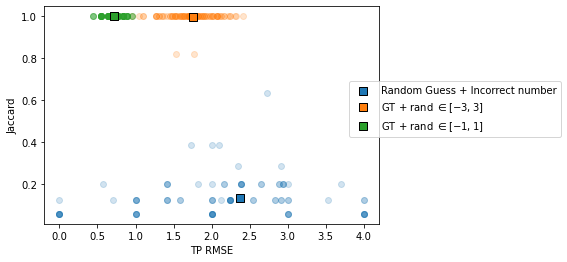

In [ ]:
labels = ['Random Guess + Incorrect number',
          r'GT + rand $\in [-3, 3]$',
          r'GT + rand $\in [-1, 1]$']

fig, ax = plt.subplots()
alpha = 0.2

T = 200; ngts = 10; npreds = 8

for case, (label, color) in enumerate(zip(labels, ['C0', 'C1', 'C2'])):
    
    rmse, ji = [], []
    GT, preds = [], []
    for _ in range(100):

        GT.append(np.sort(np.random.choice(np.arange(1,T), ngts, replace = False)))
        if case == 0:
            preds.append(np.sort(np.random.choice(np.arange(1,T), npreds, replace = False)))                  
        elif case == 1:
            preds.append(GT[-1] + np.random.randint(-3, 3, ngts))
        elif case == 2:
            preds.append(GT[-1] + np.random.randint(-1, 1, ngts))

        assignment, _ = changepoint_assignment(GT[-1], preds[-1])
        assignment = np.array(assignment)

        RMSE, JI = changepoint_error(GT[-1], preds[-1], threshold = 5)     
        
        rmse.append(RMSE)
        ji.append(JI)

    rmse_e, ji_e = ensemble_changepoint_error(GT, preds, threshold = 5)
    
    ax.scatter(rmse, ji, c = color, alpha = alpha)
    ax.scatter(rmse_e, ji_e, c = color, label = label, s = 50, marker = 's', edgecolors = 'k')
plt.setp(ax, xlabel = 'TP RMSE', ylabel = 'Jaccard')
ax.legend(loc = (0.91,0.4))

## Segments pairing 
Here we focus on pairing the segments arising from a list of changepoints. We will use this to latter compare the predicted physical properties for each segment

#### `segment_distance`

In [14]:
#|output: asis
#| echo: false
show_doc(segment_distance)

---

### segment_distance

>      segment_distance (seg1, seg2, epsilon=nan)

#### `create_binary_segment`

In [15]:
#|output: asis
#| echo: false
show_doc(create_binary_segment)

---

### create_binary_segment

>      create_binary_segment (CP, T)

Given a set of changepoints and the lenght of the trajectory, create segments which are equal to one
if the segment takes place at that position and zero otherwise

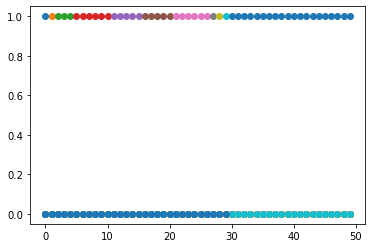

In [ ]:
T= 50
GT = np.sort(np.random.choice(np.arange(1,T), 10, replace = False))
for x in create_binary_segment(GT, T):
    plt.plot(x, 'o')

#### `jaccard_between_segments`

In [16]:
#|output: asis
#| echo: false
show_doc(jaccard_between_segments)

---

### jaccard_between_segments

>      jaccard_between_segments (gt, pred)

Given two segments, calculates the Jaccard index between them by considering TP as correct labeling,
FN as missed events and FP leftover predictions

#### `segment_assignment`

In [17]:
#|output: asis
#| echo: false
show_doc(segment_assignment)

---

### segment_assignment

>      segment_assignment (GT, preds, T=None)

Given a list of groundtruth and predicted changepoints, generates a set of segments. Then constructs 
a cost matrix by calculting the Jaccard Index between segments. From this cost matrix, we solve the 
assignment  problem via the Munkres algorithm (aka Hungarian algorithm) and returns two arrays 
containing the index of the groundtruth and predicted segments, respectively.

If T = None, then we consider that GT and preds may have different lenghts. In that case, the end
of the segments is the the last CP of each set of CPs.

**Easy case**

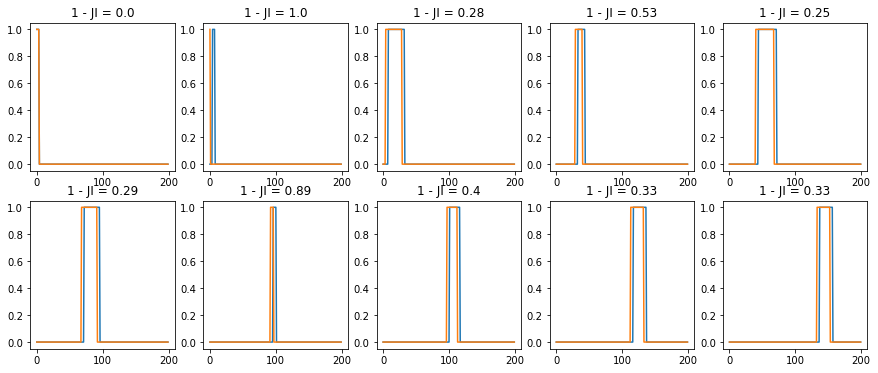

In [ ]:
T = 200; 
ngts = 10; 
GT = np.sort(np.random.choice(np.arange(1,T), ngts, replace = False))
preds = np.sort(GT + np.random.randint(-5, 5, 1) )

seg_GT = create_binary_segment(GT, T)
seg_preds = create_binary_segment(preds, T)   

[row_ind, col_ind], cost_matrix = segment_assignment(GT, preds, T)

fig, axs = plt.subplots(2, 5, figsize = (15, 6))
for r, c, ax in zip(row_ind, col_ind, axs.flatten()):
    ax.set_title(f'1 - JI = {np.round(cost_matrix[r, c], 2)}')
    ax.plot(seg_GT[r])
    ax.plot(seg_preds[c])

Different size pred / true

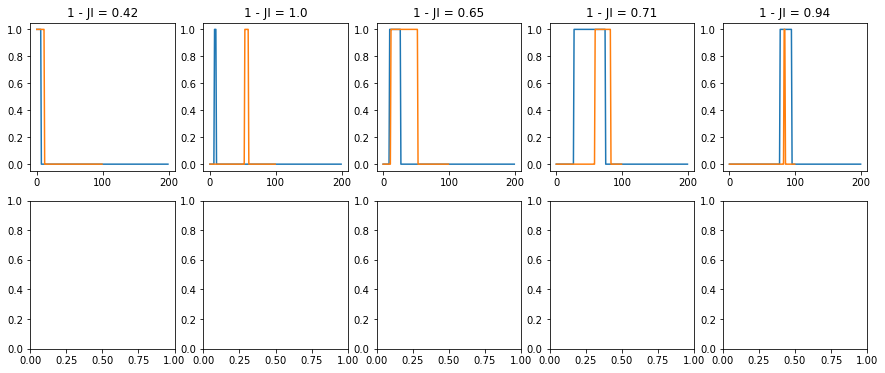

In [ ]:
T1 = 200; T2 = 100
ngts = 10; 
GT = np.sort(np.random.choice(np.arange(1,T1), ngts, replace = False))
preds = np.sort(np.random.choice(np.arange(1,T2), 5, replace = False))

seg_GT = create_binary_segment(GT, T1)
seg_preds = create_binary_segment(preds, T2)   

[row_ind, col_ind], cost_matrix = segment_assignment(GT, preds)

fig, axs = plt.subplots(2, 5, figsize = (15, 6))
for r, c, ax in zip(row_ind, col_ind, axs.flatten()):
    ax.set_title(f'1 - JI = {np.round(cost_matrix[r, c], 2)}')
    ax.plot(seg_GT[r])
    ax.plot(seg_preds[c])

**Difficult case**

<matplotlib.legend.Legend>

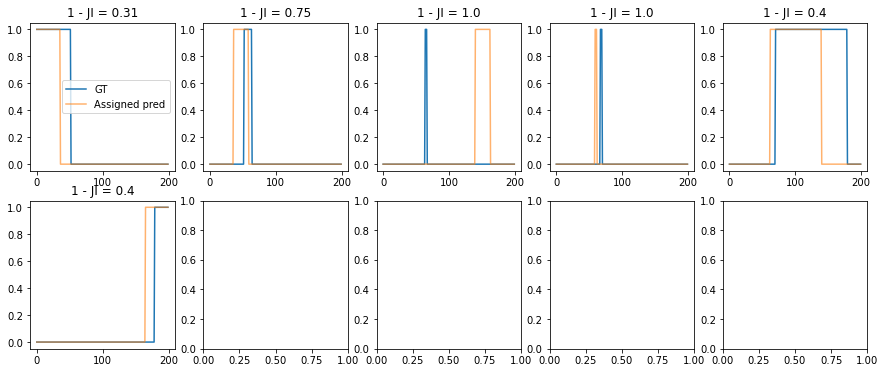

In [ ]:
T = 200;
ngts = 5; npreds = 6;
GT = np.sort(np.random.choice(np.arange(1,T), ngts, replace = False))
preds = np.sort(np.random.choice(np.arange(1,T), npreds, replace = False))  

# fig, ax = plt.subplots()
# plt.plot(GT, np.ones(ngts), 'o')
# plt.plot(preds, np.ones(npreds)*0.9, 'o')

seg_GT = create_binary_segment(GT, T)
seg_preds = create_binary_segment(preds, T)

[row_ind, col_ind], cost_matrix = segment_assignment(GT, preds, T)

fig, axs = plt.subplots(2, 5, figsize = (15, 6))
for r, c, ax in zip(row_ind, col_ind, axs.flatten()):
    ax.set_title(f'1 - JI = {np.round(cost_matrix[r, c], 2)}')
    ax.plot(seg_GT[r], label = 'GT')
    ax.plot(seg_preds[c], label = 'Assigned pred', alpha = 0.6)
axs[0,0].legend()

## Segment properties comparison

#### Metrics of segment properties

In [18]:
#|output: asis
#| echo: false
show_doc(metric_diffusive_state)

---

### metric_diffusive_state

>      metric_diffusive_state (gt=None, pred=None, max_error=False)

In [19]:
#|output: asis
#| echo: false
show_doc(metric_diffusion_coefficient)

---

### metric_diffusion_coefficient

>      metric_diffusion_coefficient (gt=None, pred=None, threshold_min=1e-12,
>                                    max_error=False)

In [20]:
#|output: asis
#| echo: false
show_doc(metric_anomalous_exponent)

---

### metric_anomalous_exponent

>      metric_anomalous_exponent (gt=None, pred=None, max_error=False)

In [ ]:
x = np.random.rand(100)
y = np.random.rand(100)

In [ ]:
mean_squared_log_error([1e6],[1e-12])

190.86835960820298

In [ ]:
metric_diffusion_coefficient(x+2,y+2, threshold_min=-2)

0.01379558958923705

#### `check_no_changepoints`

In [21]:
#|output: asis
#| echo: false
show_doc(check_no_changepoints)

---

### check_no_changepoints

>      check_no_changepoints (GT_cp, GT_alpha, GT_D, GT_s, preds_cp,
>                             preds_alpha, preds_D, preds_s, T=None)

Given predicionts over changepoints and variables, checks if in both GT and preds there is an 
absence of changepoint. If so, takes that into account to pair variables.

#### `segment_property_errors`

In [22]:
#|output: asis
#| echo: false
show_doc(segment_property_errors)

---

### segment_property_errors

>      segment_property_errors (GT_cp, GT_alpha, GT_D, GT_s, preds_cp,
>                               preds_alpha, preds_D, preds_s,
>                               return_pairs=False, T=None)

In [ ]:
T = 200; 
ngts = 10; 
errors_alpha = np.linspace(0, 1, ngts)
errors_d = np.linspace(0, 10, ngts)

metric_a, metric_d = [], []
for error_a, error_d in zip(errors_alpha, errors_d):
    la, ld = [], []
    for _ in range(100):

        GT_cp = np.sort(np.random.choice(np.arange(1,T-1), ngts, replace = False))
        preds_cp = np.sort(np.random.choice(np.arange(1,T-1), ngts, replace = False)) 

        GT_alpha = np.random.rand(GT_cp.shape[0]+1)
        preds_alpha = GT_alpha + np.random.randn(preds_cp.shape[0]+1)*error_a

        GT_D = np.abs(np.random.randn(GT_cp.shape[0]+1)*10)
        preds_D = GT_D + np.abs(np.random.randn(preds_cp.shape[0]+1))*error_d
        
        GT_s = np.random.randint(0, 5, GT_cp.shape[0]+1)
        pred_s = np.random.randint(0, 5, preds_cp.shape[0]+1)

        m_a, m_d, m_s = segment_property_errors(GT_cp, GT_alpha, GT_D, GT_s, preds_cp, preds_alpha, preds_D, preds_s, T = T)
        
        la.append(m_a); ld.append(m_d)
    
    metric_a.append(np.mean(la))
    metric_d.append(np.mean(ld))

Text(0.5, 1.0, 'Error in $D$')

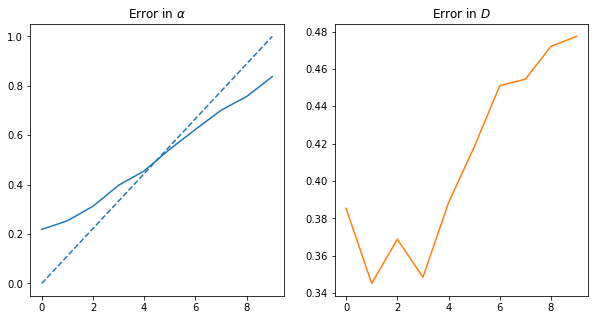

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].plot(np.arange(ngts), errors_alpha, c = 'C0', ls = '--')
ax[0].plot(np.arange(ngts), metric_a, c = 'C0')
ax[0].set_title(r'Error in $\alpha$')

# ax[1].plot(np.arange(ngts), errors_d, c = 'C1', ls = '--')
ax[1].plot(np.arange(ngts), metric_d, c = 'C1')
ax[1].set_title(r'Error in $D$')

## Ensemble metrics

### `extract_ensemble`

In [23]:
#|output: asis
#| echo: false
show_doc(extract_ensemble)

---

### extract_ensemble

>      extract_ensemble (state_label, dic)

Given an array of the diffusive state and a dictionary with the diffusion information,
returns a summary of the ensemble properties for the current dataset.

Args:
    :state_label (array): Array containing the diffusive state of the particles in the dataset.
                          For multi-state and dimerization, this must be the number associated to the
                          state (for dimerization, 0 is free, 1 is dimerized). For the rest, we follow
                          the numeration of models_phenom().lab_state.
    :dic (dictionary):    Dictionary containing the information of the input dataset.
Returns:
    :ensemble (array):    Matrix containing the ensemble information of the input dataset. It has the 
                          following shape:
                          |mu_alpha1      mu_alpha2     ... |
                          |sigma_alpha1   sigma_alpha2  ... |
                          |mu_D1          mu_D1         ... | 
                          |sigma_D1       sigma_D2      ... |
                          |counts_state1  counts_state2 ... |

### Generating multimodal from mean and variance

In [24]:
#|output: asis
#| echo: false
show_doc(multimode_dist)

---

### multimode_dist

>      multimode_dist (params, weights, bound, x, normalized=False)

### Distance between distributions

In [25]:
#|output: asis
#| echo: false
show_doc(distribution_distance)

---

### distribution_distance

>      distribution_distance (p, q)

https://stackoverflow.com/questions/44549369/kullback-leibler-divergence-from-gaussian-pm-pv-to-gaussian-qm-qv

In [ ]:
import scipy
from scipy import stats
from scipy.stats import beta as beta_func
import numpy as np
import random

In [ ]:
minimum = 1
mode = 2
maximum = 3

d = (minimum + 4*mode + maximum)/6
alpha = 6*((d - minimum)/(maximum - minimum))
beta = 6*((maximum - d)/(maximum - minimum))

location = minimum
scale = maximum - minimum

x = np.arange(-1, 5, 0.001)


pert = beta_func.pdf(x, alpha, beta, location, scale)

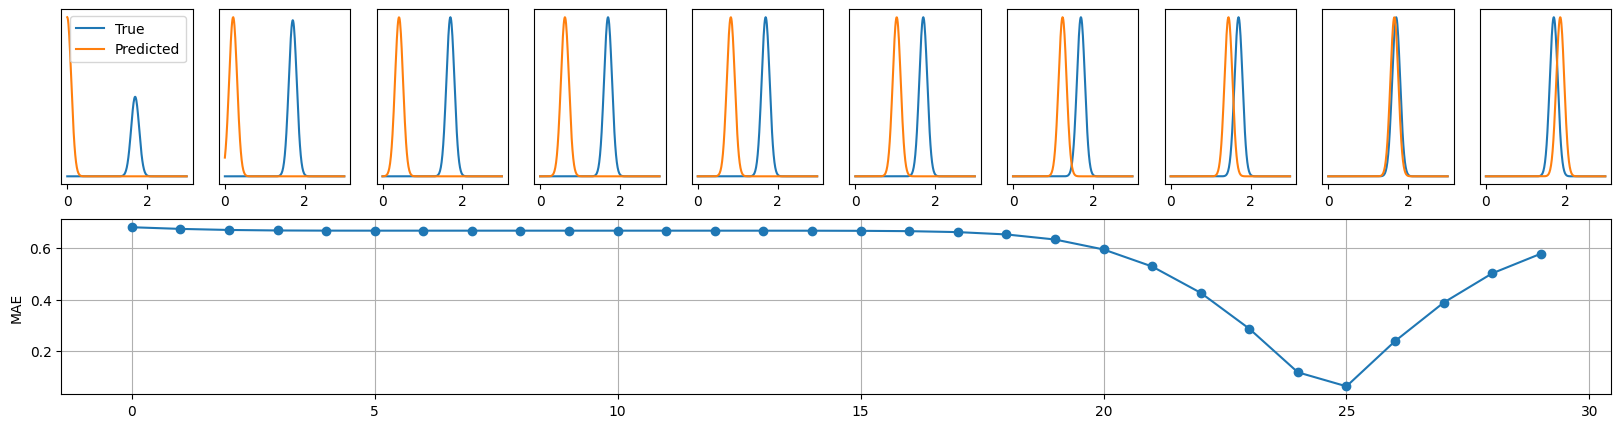

In [ ]:
means = np.linspace(0, 2, 30)
normalize = False
fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(2, 10)

# True distribution
x = np.arange(0, 3, 0.01)
params = [[1.7,0.01]]
weights = [1]
true = multimode_dist(params, weights, bound = [0, 3], x = x, normalized = normalize)



KL = []
for idx, mean in enumerate(means):
    params = [[mean, 0.01]]
    weights = [1]
    pred = multimode_dist(params, weights, bound = [0, 3], x = x, normalized = normalize)  
    KL.append(distribution_distance(true, pred))  
    
    if idx % 3 == 0:
        
        ax = fig.add_subplot(gs[0, int(idx/3)])
        ax.plot(x, true, label = 'True')
        ax.plot(x, pred, label = 'Predicted')        
        plt.setp(ax, yticks = []);
        
      
    if idx == 0:
        ax.legend()
    
ax_kl = fig.add_subplot(gs[1, :])
ax_kl.plot(KL, '-o')
plt.setp(ax_kl, ylabel = 'MAE')
ax_kl.grid()

### Calculate ensemble metric

Inputs are matrices of form:

$\mu_\alpha^1$;   $\mu_\alpha^2$ ;     ... \
$\sigma_\alpha^1$;  $\sigma_\alpha^2$ ; ...  \
$\mu_D^1$ ;        $\mu_D^2$ ;         ...  \
$\sigma_D^1$ ;      $\sigma_D^2$ ;     ... \
$N_1$, $N_2$, ... 

In [26]:
#|output: asis
#| echo: false
show_doc(error_Ensemble_dataset)

---

### error_Ensemble_dataset

>      error_Ensemble_dataset (true_data, pred_data, return_distributions=False)

## Reading participants predictions

The participants will have to output predictions in a .txt file were each line corresponds to the predictions of a trajectory. The latter have to be ordered as:

0, d$_0$, a$_0$, s$_0$, t$_1$, d$_1$, a$_1$, s$_1$, t$_2$, d$_2$, a$_2$, s$_2$, .... t$_n$, d$_n$, a$_n$, s$_n$

where the first number corresponds to the trajectory index, then d$_i$, a$_i$, s$_i$ correspond to the diffusion coefficient, anomalous exponent and diffusive state of the $i$-th segment. For the latter, we have the following code:
 - 0: immobile
 - 1: confined
 - 2: brownian
 - 3: anomalous
 
Last, t$_j$ corresponds to the $j$-th changepoints. Each prediction **must** contain $C$ changepoints and $C+1$ segments property values. If this is not fulfilled, the whole trajectory is considered as mispredicted.

The .txt file will be first inspected. The data will then be collected into a dataframe

#### `check_prediction_length`

In [27]:
#|output: asis
#| echo: false
show_doc(check_prediction_length)

---

### check_prediction_length

>      check_prediction_length (pred)

Given a trajectory segments prediction, checks whether it has C changepoints and C+1 segments properties values.
As it must also contain the index of the trajectory, this is summarized by being multiple of 4. 
In some cases, the user needs to also predict the final point of the trajectory. In this case, 
we will have a residu of 1

#### `separate_prediction_values`

In [28]:
#|output: asis
#| echo: false
show_doc(separate_prediction_values)

---

### separate_prediction_values

>      separate_prediction_values (pred)

Given a trajectory segments prediction, extracts the predictions for each segment property as well as the changepoint values

#### `load_file_to_df`

In [29]:
#|output: asis
#| echo: false
show_doc(load_file_to_df)

---

### load_file_to_df

>      load_file_to_df (path_file, columns=['traj_idx', 'Ds', 'alphas',
>                       'states', 'changepoints'])

Given the path of a .txt file, extract the segmentation predictions based on 
the rules of the ANDI Challenge 2022

Saving fake data for test

In [ ]:
file_gt, file_p = [], []
T = 200; ngts = 10;
for traj in range(100):
    GT_cp = np.sort(np.random.choice(np.arange(1,T), ngts, replace = False))
    preds_cp = np.sort(np.random.choice(np.arange(1,T+50), ngts, replace = False)) 

    GT_alpha = np.random.rand(GT_cp.shape[0]+1)
    preds_alpha = GT_alpha# + 0.1 #np.random.randn(preds_cp.shape[0]+1)*0.1

    GT_D = np.abs(np.random.randn(GT_cp.shape[0]+1)*10)
    preds_D = GT_D + 1.5 #np.abs(np.random.randn(preds_cp.shape[0]+1))*1.6
    
    GT_state = np.random.randint(0, high = 5, size = GT_cp.shape[0]+1)
    preds_state = np.random.randint(0, high = 5, size = preds_cp.shape[0]+1)
    
    list_gt, list_p = [traj, GT_D[0], GT_alpha[0], GT_state[0]], [traj, preds_D[0], preds_alpha[0], preds_state[0]]
    for gtc, gta, gtd, gts, pc, pa, pd, ps in zip(GT_cp, GT_alpha[1:], GT_D[1:], GT_state[1:], preds_cp, preds_alpha[1:], preds_D[1:], preds_state[1:]):
        list_gt += [gtc, gtd, gta, gts]
        list_p += [pc, pd, pa, ps]
        
    file_gt.append(list_gt)
    if traj != 6:
        file_p.append(list_p)
        
pred_path, true_path = 'pred_test.txt', 'true_test.txt'
np.savetxt(true_path, file_gt, delimiter=',')
np.savetxt(pred_path, file_p, delimiter=',')

Recovering the data

In [ ]:
pred_path, true_path = 'pred_test.txt', 'true_test.txt'

df_pred = load_file_to_df(pred_path)
df_true = load_file_to_df(true_path)

#### `error_SingleTraj_dataset`

In [30]:
#|output: asis
#| echo: false
show_doc(error_SingleTraj_dataset)

---

### error_SingleTraj_dataset

>      error_SingleTraj_dataset (df_pred, df_true, threshold_error_alpha=2,
>                                max_val_alpha=2, min_val_alpha=0,
>                                threshold_error_D=100000.0,
>                                max_val_D=1000000.0, min_val_D=1e-06,
>                                threshold_error_s=-1, threshold_cp=10,
>                                prints=True, disable_tqdm=False)

Given two dataframes, corresponding to the predictions and true labels of a set
of trajectories from the ANDI challenge 2022, calculates the corresponding metrics
Columns must be for both (no order needed):
traj_idx | alphas | Ds | changepoints | states
df_true must also contain a column 'T'

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df_pred |  |  |  |
| df_true |  |  |  |
| threshold_error_alpha | int | 2 |  |
| max_val_alpha | int | 2 |  |
| min_val_alpha | int | 0 |  |
| threshold_error_D | float | 100000.0 |  |
| max_val_D | float | 1000000.0 |  |
| min_val_D | float | 1e-06 | this is in linear scale |
| threshold_error_s | int | -1 | this will transform nan into non-existing state |
| threshold_cp | int | 10 |  |
| prints | bool | True |  |
| disable_tqdm | bool | False |  |

####  Test

**Two datasets with same number of trajs**

In [ ]:
trajs, labels = models_phenom().immobile_traps(T = 200, N = 250, alphas=0.5, Ds = 1, L = 20, Nt = 100, Pb = 1, Pu = 0.5)

trajs = trajs.transpose((1, 0, 2)).copy()
labels = labels.transpose(1, 0, 2)

df_in, df_trues = data_to_df(trajs, labels, label_values=[0.5, 1], diff_states=[3, 2])

trajs, labels = models_phenom().immobile_traps(T = 200, N = 250, alphas=[0.5, 0.1], Ds = 1, L = 20, Nt = 100, Pb = 1, Pu = 0.5)

trajs = trajs.transpose((1, 0, 2)).copy()
labels = labels.transpose(1, 0, 2)

df_in, df_preds = data_to_df(trajs, labels, label_values=[0.5, 1], diff_states=[3, 2])

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
error_SingleTraj_dataset(df_preds, df_trues, prints = True)

  0%|          | 0/250 [00:00<?, ?it/s]

Summary of metrics assesments:

Changepoint Metrics 
RMSE: 3.977 
Jaccard Index: 0.436 

Diffusion property metrics 
Metric anomalous exponent: 0.3196485708934536 
Metric diffusion coefficient: 0.233730617081089 
Metric diffusive state: 0.5135203436947182


(3.9773268837631606,
 0.43570617804443,
 0.3196485708934536,
 0.233730617081089,
 0.5135203436947182)

**Two datasets with different number of trajectories**

In [ ]:
trajs, labels = models_phenom().immobile_traps(T = 200, N = 350, alphas=[0.5,0.01], Ds = [1., 0.1], L = 20, Nt = 100, Pb = 1, Pu = 0.5)

trajs = trajs.transpose((1, 0, 2)).copy()
labels = labels.transpose(1, 0, 2)

df_in, df_trues = data_to_df(trajs, labels, label_values=[0.5, 1], diff_states=[3, 2])

trajs, labels = models_phenom().immobile_traps(T = 200, N = 250, alphas=[0.5, 0.1], Ds = 1, L = 20, Nt = 100, Pb = 1, Pu = 0.5)

trajs = trajs.transpose((1, 0, 2)).copy()
labels = labels.transpose(1, 0, 2)

df_in, df_preds = data_to_df(trajs, labels, label_values=[0.5, 1], diff_states=[3, 2])

  0%|          | 0/350 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
error_SingleTraj_dataset(df_preds, df_trues, prints = True)

  0%|          | 0/350 [00:00<?, ?it/s]

Summary of metrics assesments:

100 missing trajectory/ies. 

Changepoint Metrics 
RMSE: 4.051 
Jaccard Index: 0.441 

Diffusion property metrics 
Metric anomalous exponent: 0.35483874584715985 
Metric diffusion coefficient: 3.1690909054732668 
Metric diffusive state: 0.4913685263947961


(4.050708208970335,
 0.4407643312101911,
 0.35483874584715985,
 3.1690909054732668,
 0.4913685263947961)

In [ ]:
trajs, labels = models_phenom().immobile_traps(T = 200, N = 5, alphas=[0.5,0.01], Ds = [1., 0.1], L = 20, Nt = 100, Pb = 1, Pu = 0.5)

trajs = trajs.transpose((1, 0, 2)).copy()
labels = labels.transpose(1, 0, 2)

df_in, df_preds  = data_to_df(trajs, labels, label_values=[0.5, 1], diff_states=[3, 2])

trajs, labels = models_phenom().multi_state(T = 200, N = 7, L = 20, M = np.array([[0.9,0.1],[0.9,0.1]]))

trajs = trajs.transpose((1, 0, 2)).copy()
labels = labels.transpose(1, 0, 2)

df_in, df_trues  = data_to_df(trajs, labels, label_values=[0.5, 1], diff_states=[3, 2])

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
error_SingleTraj_dataset(df_preds, df_trues, prints = True);

  0%|          | 0/7 [00:00<?, ?it/s]

Summary of metrics assesments:

2 missing trajectory/ies. 

Changepoint Metrics 
RMSE: 2.903 
Jaccard Index: 0.188 

Diffusion property metrics 
Metric anomalous exponent: 0.8269399281523714 
Metric diffusion coefficient: 8.262443034681892 
Metric diffusive state: 0.41379310344827586


# Codalab scoring program

**File organization**

Names: `Ti_ens_exp_XXX_fov_yyy.txt`  and  `Ti_st_exp_XXX_fov_yyy.txt`, where `i` refers to the track and can be 1 (video track) or 2 (trajectory track)

**Extra information**

We will have an extra reference file which gives the model of each experiment. This is done to avoid considering Single state in the averages of change point metrics

In [31]:
#|output: asis
#| echo: false
show_doc(listdir_nohidden)

---

### listdir_nohidden

>      listdir_nohidden (path)

**CHECK TRELLO LIST: we need to introduce weighting of the FOVs w.r.t to number of trajectories?**

In [32]:
#|output: asis
#| echo: false
show_doc(codalab_scoring)

---

### codalab_scoring

>      codalab_scoring (input_dir, output_dir)

In [ ]:
input_dir = 'C:/Users/Gorka/github/ANDI_datasets/testing/codalab_data'
output_dir = 'C:/Users/Gorka/github/ANDI_datasets/testing/codalab_data'

codalab_scoring(input_dir=input_dir, output_dir=output_dir)

  0%|          | 0/36 [00:00<?, ?it/s]

# NBDEV Export

In [ ]:
import nbdev; nbdev.nbdev_export()